#### Problem Statement: breast cancer prediction

NoteBook Structure as follows:

    1.Exploratory Data Analysis.
        1.1 Missing value check.
        1.2 Categorical & numerical variable identification & Encoding.
        1.3 Target variable analysis.
    2. Data visualization.
        2.1 Normality Check.
        2.2 Outlier Detection.
        2.3 Correlation check.
    3. Train Test Split
    4. Model Building.
    5. Hyperparameter tuning.
    6. Model Evaluation.
    

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.stats import norm 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import random
import time
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
%matplotlib inline

#### 1. Exploratory Data Analysis

In [2]:
# url of dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"


# Assign column names to the dataset
names = ['id', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst'] 


# Read dataset to pandas dataframe
df = pd.read_csv(url, names=names)

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape # 569 rows & 32 features

(569, 32)

In [5]:
# Setting 'id_number' as index
df.set_index(['id'], inplace = True)

###### 1.1 Missing value check

In [6]:
df.isnull().sum() # No missing values

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

###### 1.2 Categorical & numerical variable check

In [7]:
df.dtypes # diagnosis -> categorical variable

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave_points_worst

###### 1.3 Target variable

Number of Records in diagnosis ['M' 'B']
B    357
M    212
Name: diagnosis, dtype: int64


The % distribution of diagnosis  ['M' 'B']
B    63.0
M    37.0
Name: diagnosis, dtype: float64


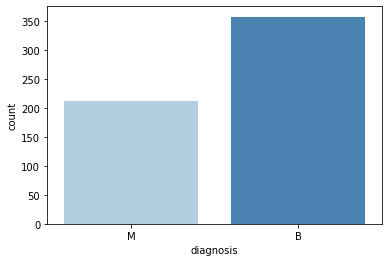

In [8]:
print("Number of Records in diagnosis", df['diagnosis'].unique())
print(df.diagnosis.value_counts())
print("\n")
sns.countplot('diagnosis',data = df,palette="Blues") 
print("The % distribution of diagnosis ",df['diagnosis'].unique())
print(round(df["diagnosis"].value_counts(normalize=True),2)*100)

In [9]:
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0}) # Encoding on Target variable. 

#### 2. Data visualization 

###### 2.1 Normality check

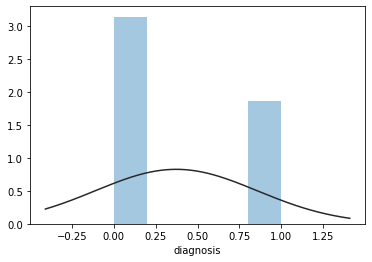

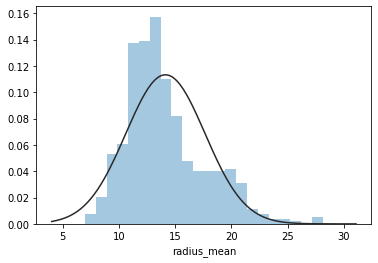

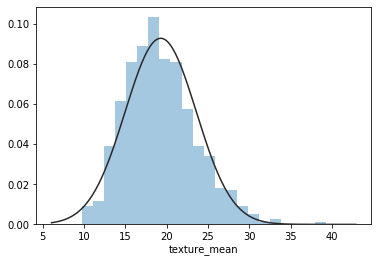

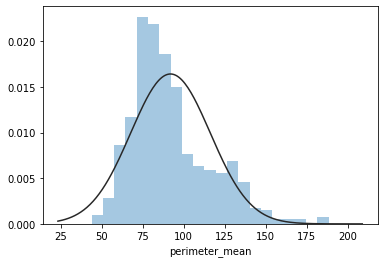

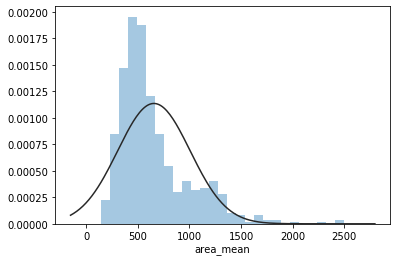

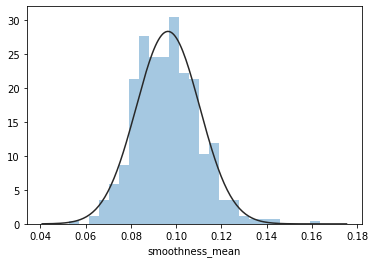

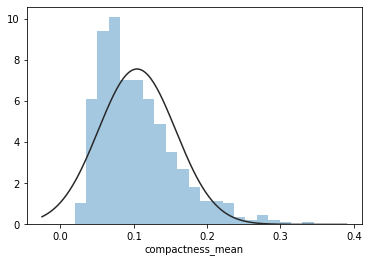

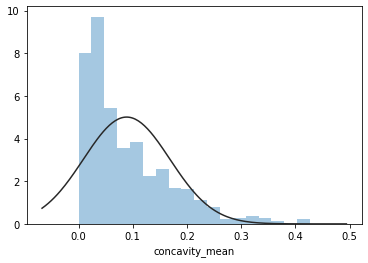

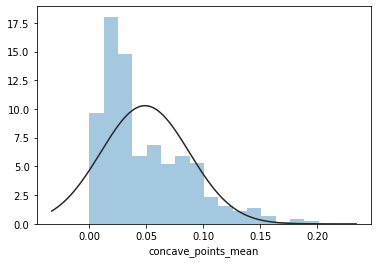

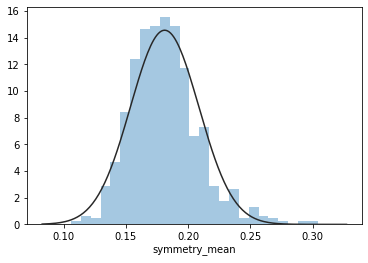

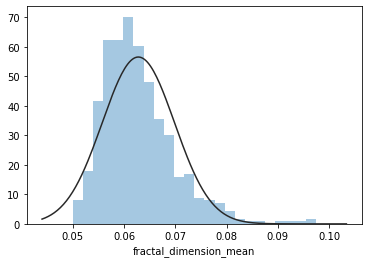

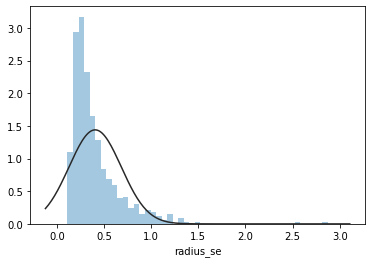

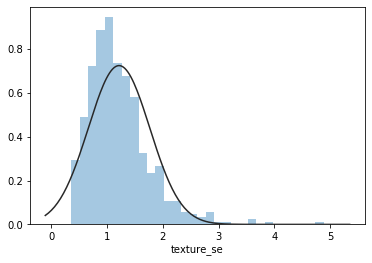

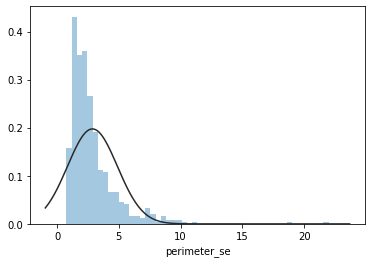

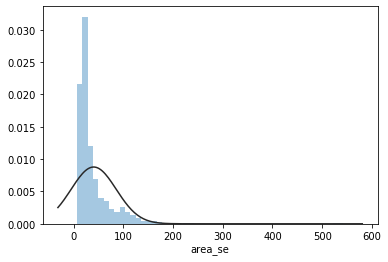

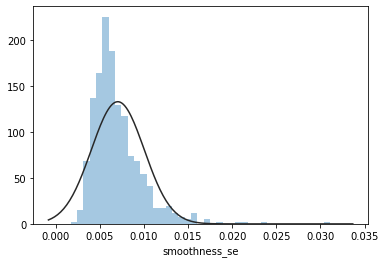

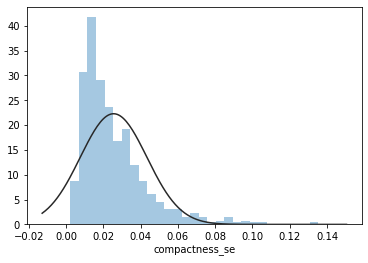

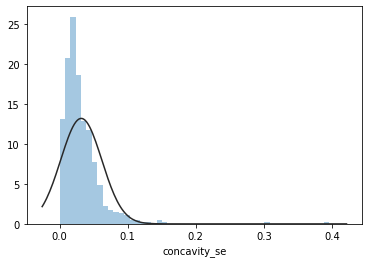

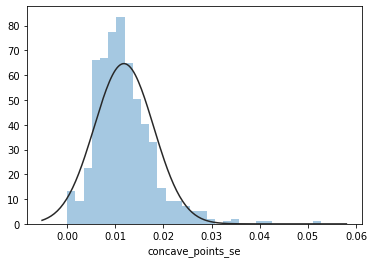

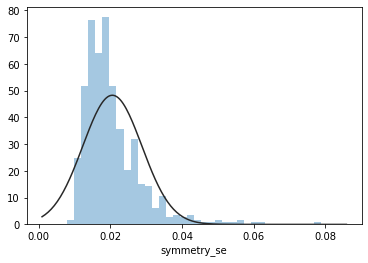

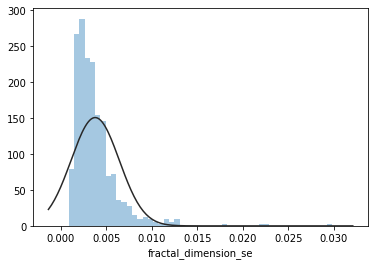

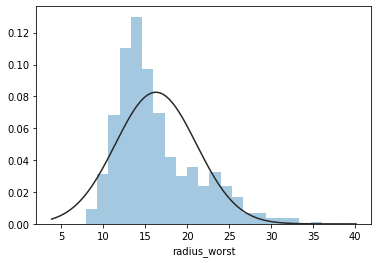

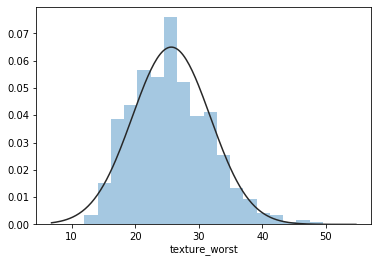

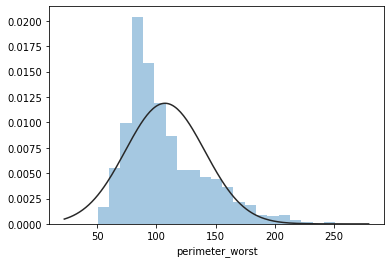

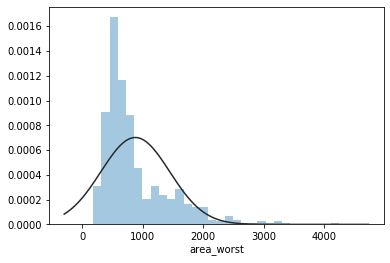

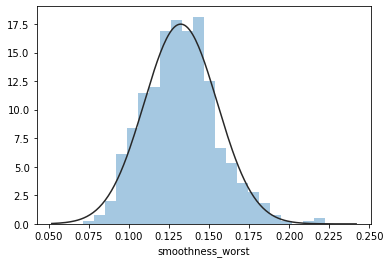

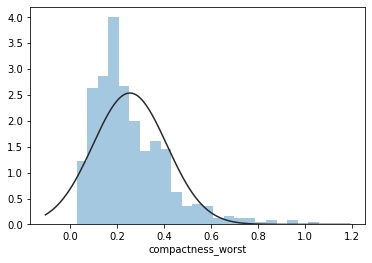

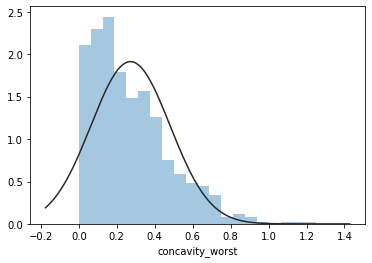

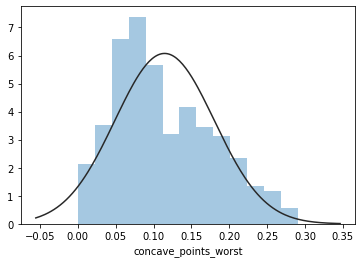

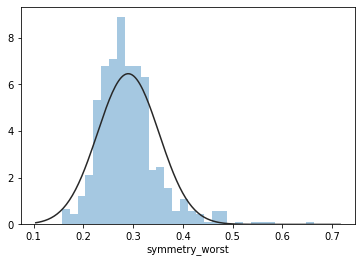

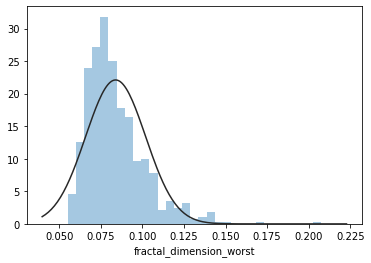

In [10]:
for each in df: # Most of distribution are right skewed.
    sns.distplot(df[each], fit=norm, kde=False)
    plt.show()

In [11]:
df.skew()

diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave_points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave_points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

###### 2.2 Outlier Detection

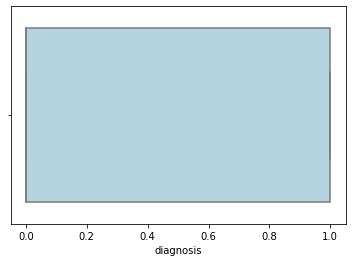

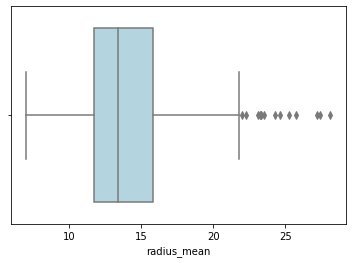

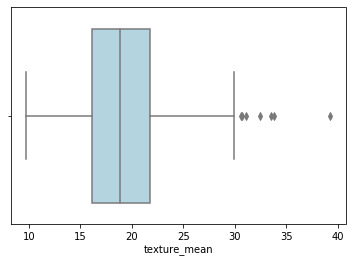

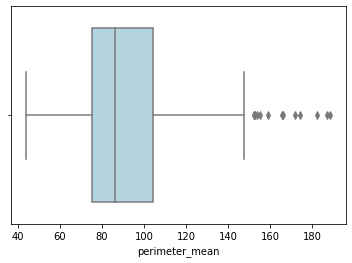

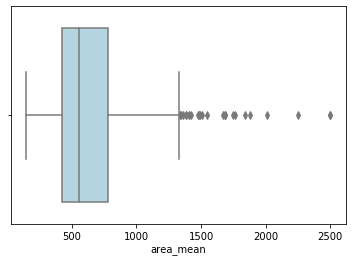

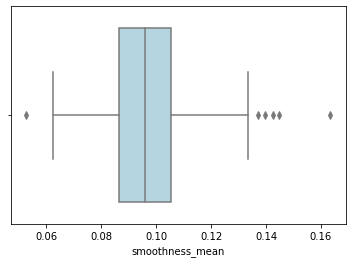

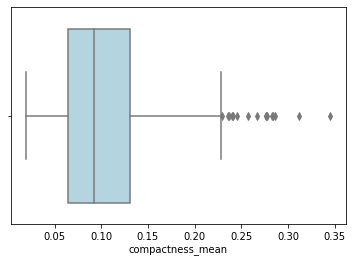

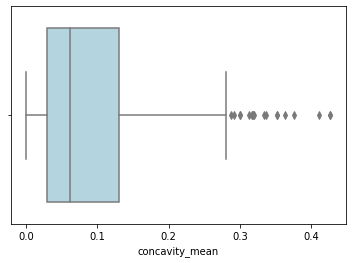

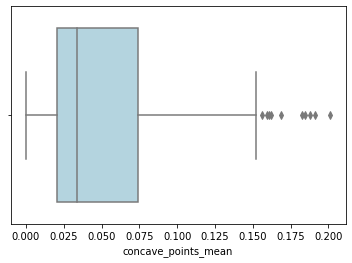

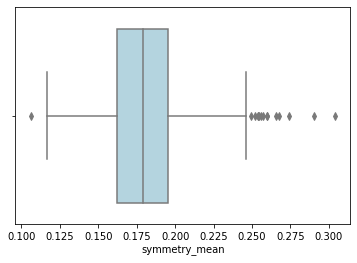

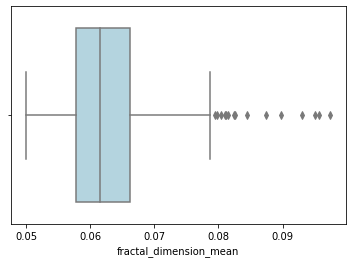

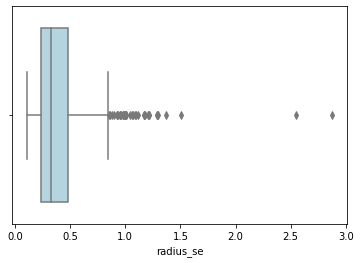

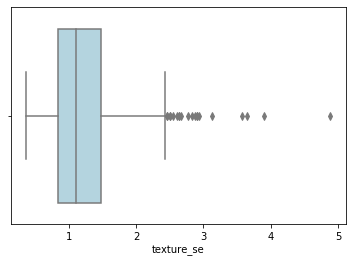

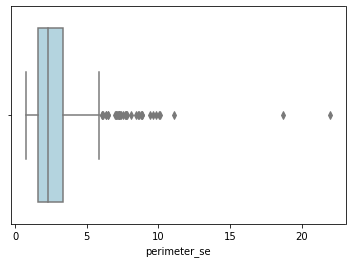

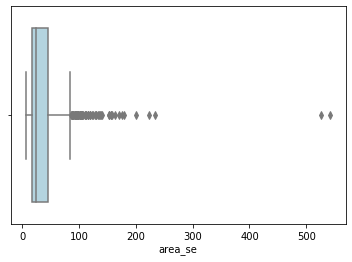

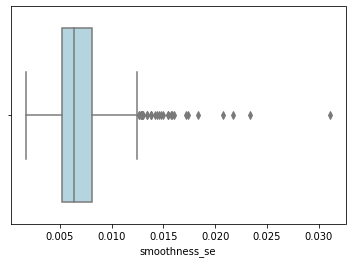

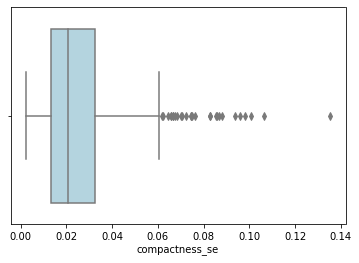

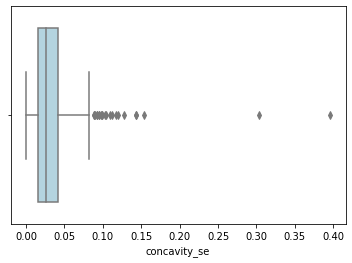

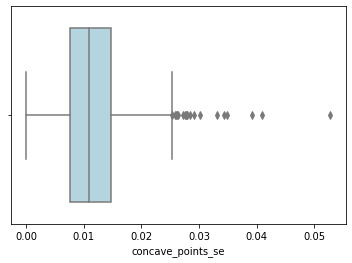

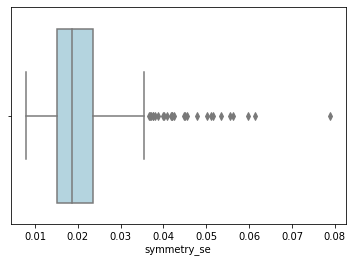

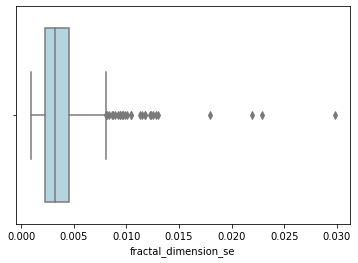

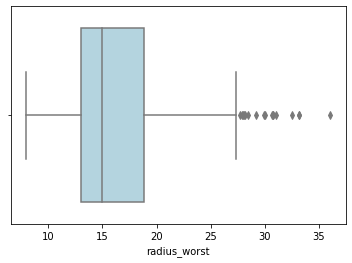

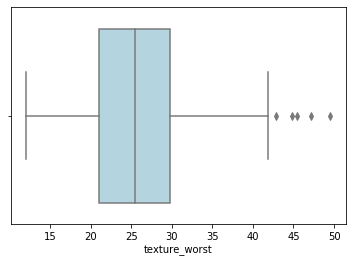

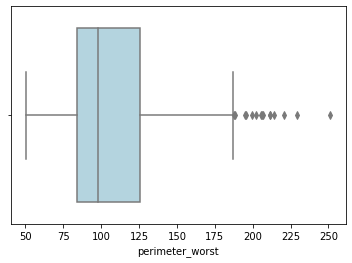

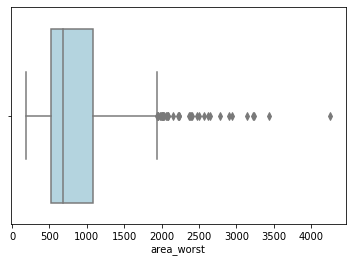

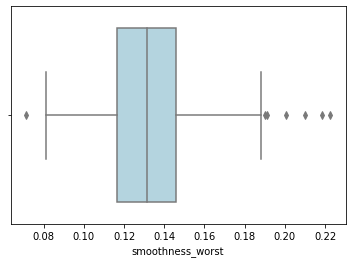

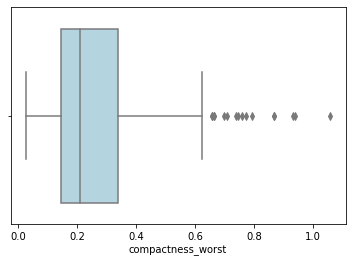

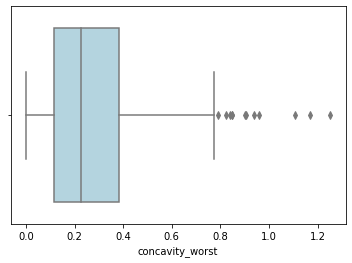

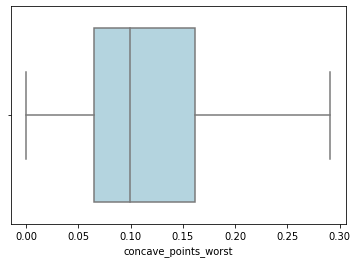

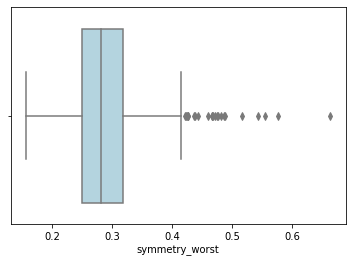

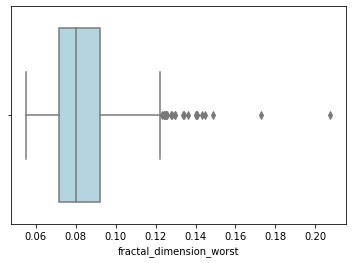

In [12]:
for each in df: # Outlier Detection using Boxplot.
    sns.boxplot(df[each],color="lightblue")
    plt.show()  # outlier are present in dataset.

###### 1.3 Correlation check

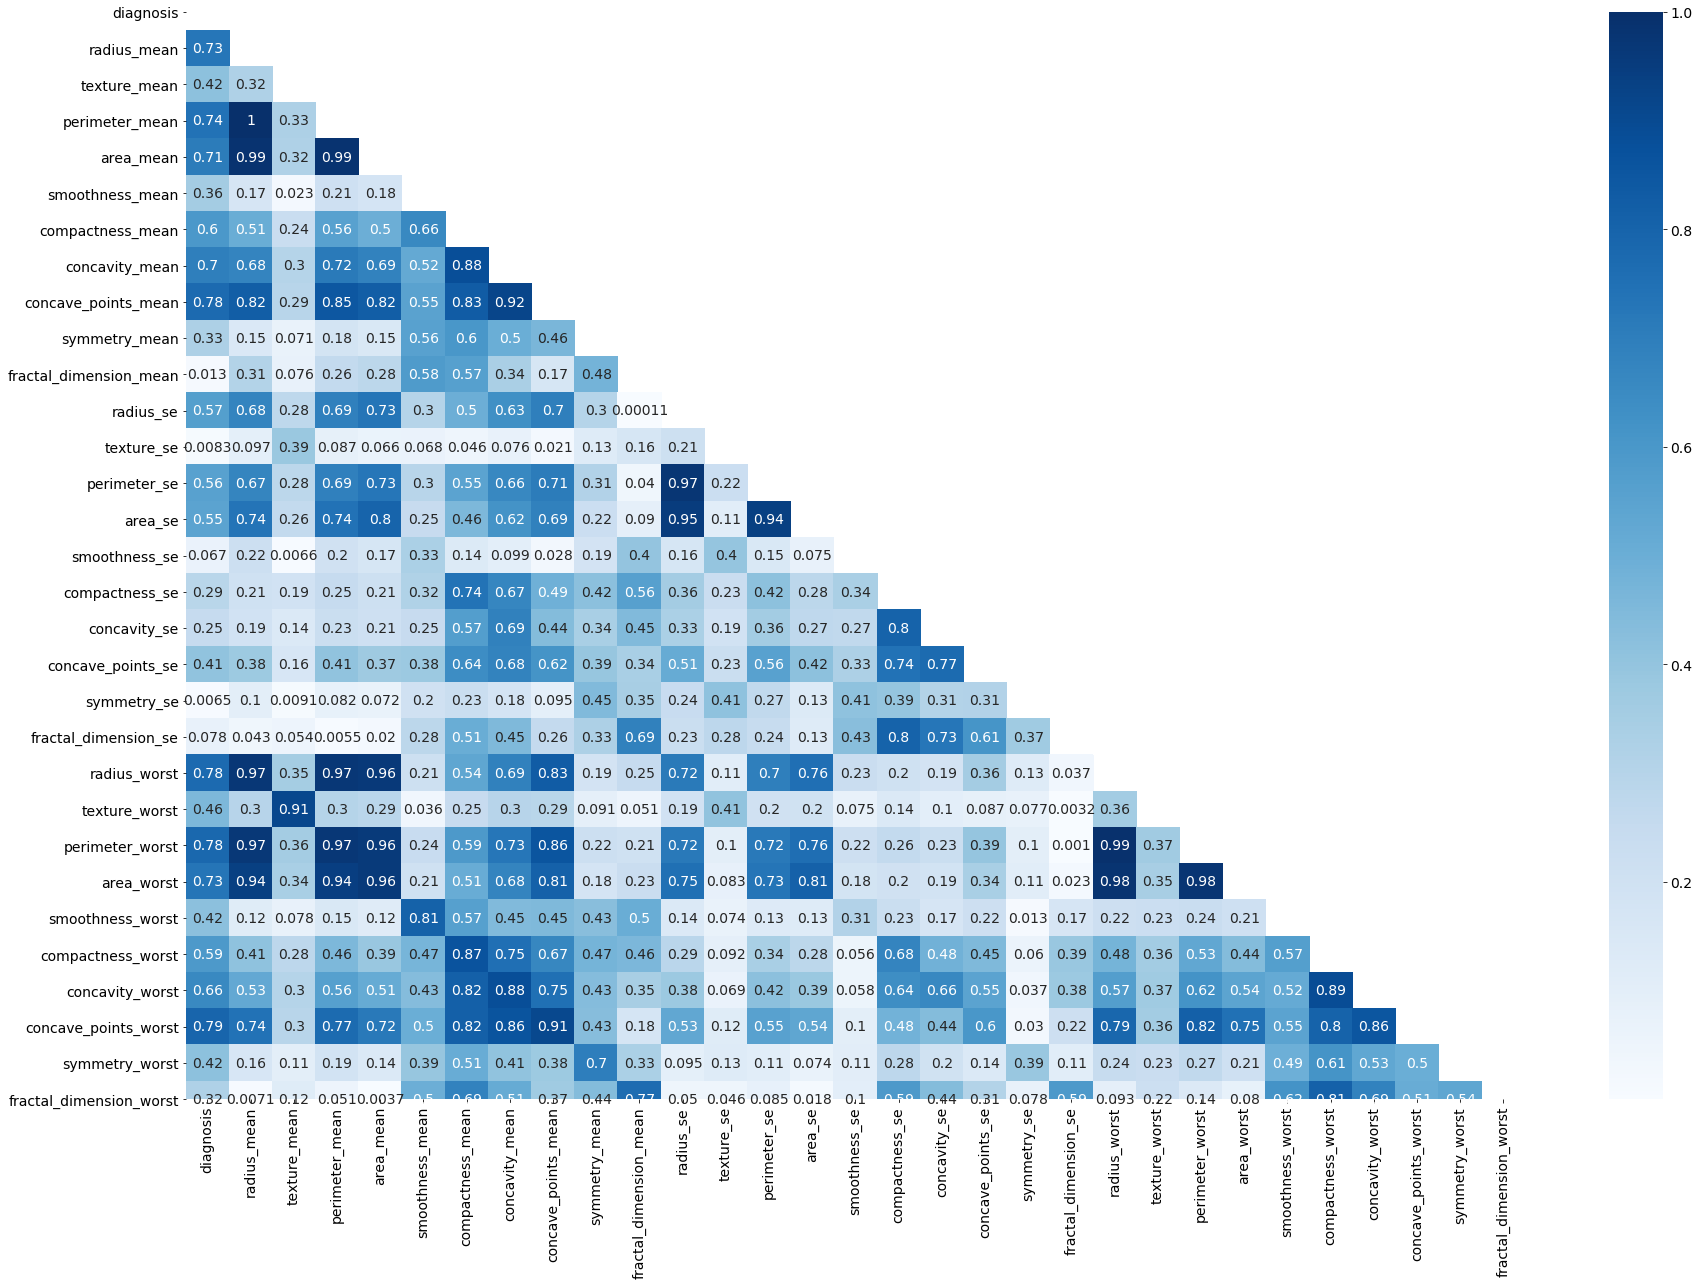

In [13]:
corr=df.corr() # Bivariate Analysis
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(30,20))
sns.heatmap(corr.abs(),annot=True,mask=mask,cmap="Blues")

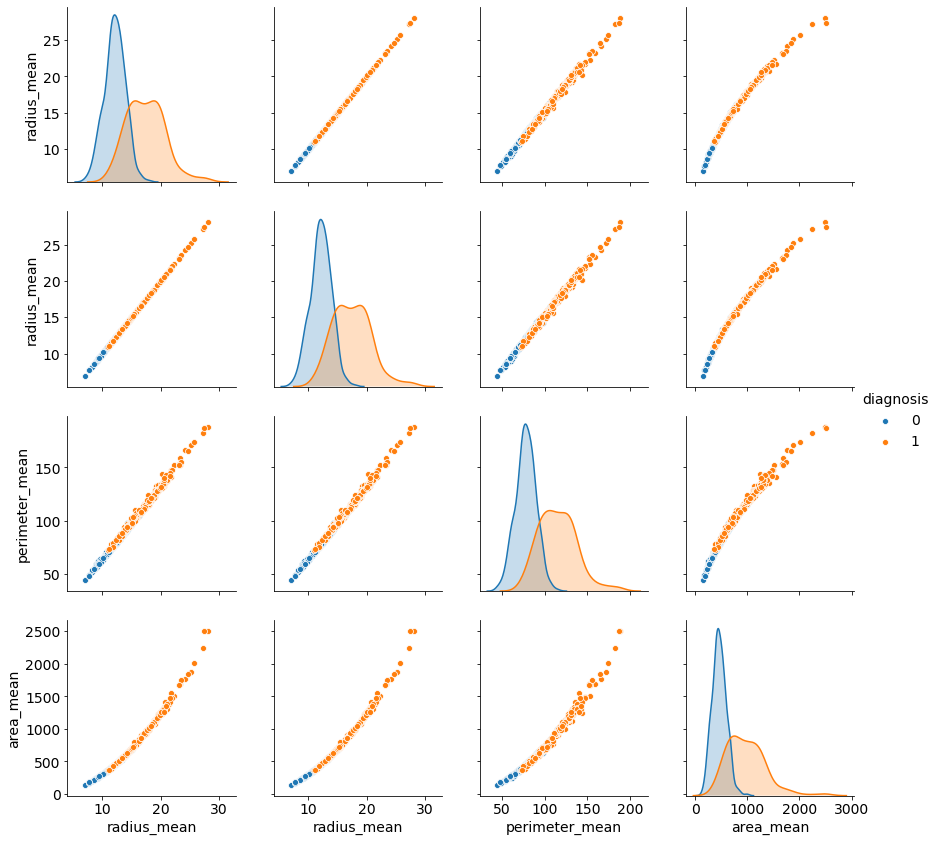

In [14]:
sns.pairplot(df, hue="diagnosis", height=3, vars=["radius_mean","radius_mean","perimeter_mean","area_mean"]) # Multivariate Analysis -> +vely correlated.

###### 3.Train Test Split

In [15]:
x=df.drop(["diagnosis"],axis=1).values
y=df["diagnosis"].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.3)

#### 4. Model Building

In [16]:
model_1=RandomForestClassifier(random_state=42)

###### 5. Hyperparameter Tuning

In [17]:
np.random.seed(42)
start = time.time()
param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}
cv_rf = GridSearchCV(model_1, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)
cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': None}
Time taken in grid search:  62.70


In [18]:
model_1.set_params(bootstrap=True, criterion='gini', max_depth=4, max_features=None)

RandomForestClassifier(max_depth=4, max_features=None, random_state=42)

In [19]:
model_1.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_features=None, random_state=42)

#### 6. Model Evaluation

In [20]:
predicted_1=model_1.predict(x_test)

In [21]:
print("\n Confusion_matrix: \n",confusion_matrix(y_test,predicted_1))
print("\n Classification_report: \n",classification_report(y_test,predicted_1))


 Confusion_matrix: 
 [[111   4]
 [  3  53]]

 Classification_report: 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.93      0.95      0.94        56

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.95       171
weighted avg       0.96      0.96      0.96       171



In [22]:
model_score_train = model_1.score(x_train, y_train)
print("Training score: ",model_score_train)
model_score_test = model_1.score(x_test, y_test)
print("\n Testing score: ",model_score_test)

Training score:  0.992462311557789

 Testing score:  0.9590643274853801


###### Learning curve

In [25]:
X_data = df.drop("diagnosis", axis=1)         
Y_data = df["diagnosis"] 
train_sizes=[50,200,300,400]
train_sizes, train_scores, test_scores= learning_curve(model_1, X_data, Y_data, train_sizes=train_sizes, cv = 10, scoring = 'accuracy')

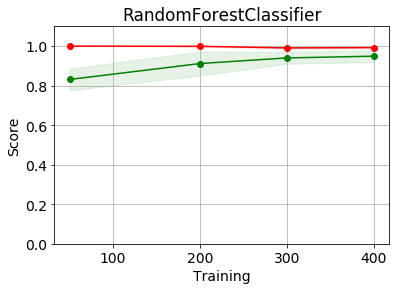

In [31]:
# Plot learning curve

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

plt.grid()
plt.title("RandomForestClassifier")
plt.xlabel("Training")
plt.ylabel("Score")
    
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
                     
plt.ylim(0,1.1)
plt.show()

###### Area under curve

Area Under ROC Curve for


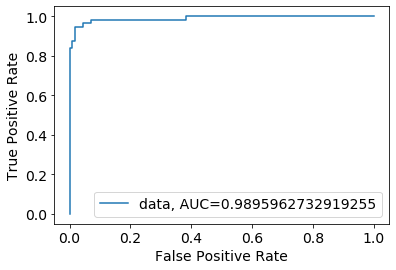

In [30]:
#auc
print("Area Under ROC Curve for")
y_pred_proba = model_1.predict_proba(x_test)[::,1]
fpr,tpr,vvth=roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, AUC="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("\n")

                                                                                                          Dhanya Jayan